In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation, Dropout  
from keras.layers import LSTM
from keras.models import Sequential
from datetime import datetime
from binance.client import Client 
import os
from dotenv import load_dotenv
load_dotenv()

2025-02-04 17:20:56.770936: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 17:20:56.771433: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 17:20:56.774533: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 17:20:56.805349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-04 17:20:57.463302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

True

In [2]:
api_key = os.getenv("API_KEY")
api_secret = os.getenv("API_SECRET")

client = Client(api_key, api_secret)

In [3]:
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_5MINUTE, limit=1000)

In [4]:
len(candles)

1000

In [5]:
candles[999]

[1738686000000,
 '99618.88000000',
 '99618.88000000',
 '99532.60000000',
 '99532.60000000',
 '29.86762000',
 1738686299999,
 '2973977.10618400',
 5700,
 '14.84321000',
 '1477774.13291140',
 '0']

In [6]:
price = np.array([float(candles[i][4]) for i in range(1000)])

In [7]:
time = np.array([int(candles[i][0]) for i in range(1000)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(1000)])

In [8]:
price.shape
print(price)

[102367.64 102352.4  102458.41 102465.96 102479.47 102455.49 102549.39
 102549.01 102551.56 102491.72 102500.   102451.08 102478.28 102429.6
 102388.   102339.99 102354.9  102346.81 102324.71 102294.07 102280.48
 102389.76 102402.91 102447.88 102476.44 102443.36 102348.91 102292.22
 102301.44 102280.   102239.93 102196.08 102182.26 102204.4  102166.49
 102213.99 102217.99 102205.63 102041.15 102010.   102009.26 101971.79
 102020.99 102011.05 102021.07 101962.71 102016.85 101906.9  101856.49
 101800.01 101838.45 101916.51 101865.14 101745.88 101649.22 101620.29
 101545.61 101591.   101675.99 101755.65 101883.33 101820.   101750.35
 101927.3  101872.03 101956.   101900.43 101776.   101713.07 101776.
 101638.   101712.01 101817.53 101881.43 102026.79 101945.54 101980.68
 101970.47 101920.01 101959.99 101950.   101990.   102028.81 102081.56
 102123.01 102096.94 102070.1  102105.9  102178.6  102216.76 102250.01
 102238.93 102267.53 102297.25 102277.71 102178.65 102230.01 102257.96
 102238.2

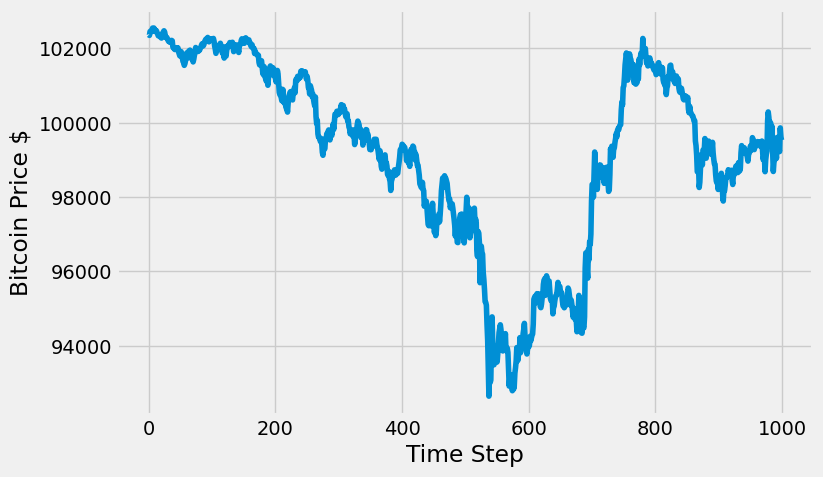

In [9]:
plt.figure(figsize=(8,5))
plt.xlabel('Time Step')
plt.ylabel('Bitcoin Price $')
plt.plot(price)

In [10]:
timeframe = pd.DataFrame({'Time':t,'Price $BTC':price})
timeframe

,Time,Price $BTC
0,06:05:00,102367.64
1,06:10:00,102352.40
2,06:15:00,102458.41
3,06:20:00,102465.96
4,06:25:00,102479.47
...,...,...
995,17:00:00,99284.01
996,17:05:00,99225.01
997,17:10:00,99861.99
998,17:15:00,99618.87


In [11]:
price = price.reshape(1000,1)
print(price)

[[102367.64]
 [102352.4 ]
 [102458.41]
 [102465.96]
 [102479.47]
 [102455.49]
 [102549.39]
 [102549.01]
 [102551.56]
 [102491.72]
 [102500.  ]
 [102451.08]
 [102478.28]
 [102429.6 ]
 [102388.  ]
 [102339.99]
 [102354.9 ]
 [102346.81]
 [102324.71]
 [102294.07]
 [102280.48]
 [102389.76]
 [102402.91]
 [102447.88]
 [102476.44]
 [102443.36]
 [102348.91]
 [102292.22]
 [102301.44]
 [102280.  ]
 [102239.93]
 [102196.08]
 [102182.26]
 [102204.4 ]
 [102166.49]
 [102213.99]
 [102217.99]
 [102205.63]
 [102041.15]
 [102010.  ]
 [102009.26]
 [101971.79]
 [102020.99]
 [102011.05]
 [102021.07]
 [101962.71]
 [102016.85]
 [101906.9 ]
 [101856.49]
 [101800.01]
 [101838.45]
 [101916.51]
 [101865.14]
 [101745.88]
 [101649.22]
 [101620.29]
 [101545.61]
 [101591.  ]
 [101675.99]
 [101755.65]
 [101883.33]
 [101820.  ]
 [101750.35]
 [101927.3 ]
 [101872.03]
 [101956.  ]
 [101900.43]
 [101776.  ]
 [101713.07]
 [101776.  ]
 [101638.  ]
 [101712.01]
 [101817.53]
 [101881.43]
 [102026.79]
 [101945.54]
 [101980.68]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [13]:
scaler.fit(price[:750])

StandardScaler()

In [14]:
price = scaler.transform(price)

In [15]:
df = pd.DataFrame(price.reshape(200,5),columns=['First','Second','Third','Fourth','Target'])

In [16]:
df.head()

,First,Second,Third,Fourth,Target
0,1.261132,1.255616,1.293983,1.296716,1.301606
1,1.292927,1.326911,1.326773,1.327696,1.306039
2,1.309036,1.291331,1.301175,1.283557,1.268501
3,1.251125,1.256521,1.253593,1.245595,1.234506
4,1.229587,1.269138,1.273897,1.290172,1.300509


## Train Test Split


In [17]:
x_train = df.iloc[:149,:4]
y_train = df.iloc[:149,-1]

x_test = df.iloc[145:199,:4]
y_test = df.iloc[145:199,-1]

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
x_train.shape , x_test.shape

((149, 4, 1), (54, 4, 1))

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential()

model.add(Input(shape=(4, 1)))

model.add(LSTM(40, return_sequences=True))

model.add(LSTM(80, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 40)          │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 80)             │        38,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,521 (177.82 KB)

 Trainable params: 45,521 (177.82 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train, y_train, batch_size=5,epochs=500)

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5893
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232 
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195
Epoch 13/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 
Epoch 14/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 
Epoch 15/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

In [23]:
y_pred = model.predict(x_test)
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[-0.07462043]
 [ 0.08031793]
 [ 0.29678354]
 [ 0.36977157]
 [ 0.5629678 ]
 [ 0.9976369 ]
 [ 0.9037554 ]
 [ 0.9163605 ]
 [ 0.78752387]
 [ 0.8189727 ]
 [ 1.0436686 ]
 [ 1.1068507 ]
 [ 0.95606554]
 [ 0.9761952 ]
 [ 0.91360676]
 [ 0.90210843]
 [ 0.8794521 ]
 [ 0.8065866 ]
 [ 0.7472507 ]
 [ 0.9403957 ]
 [ 0.86159945]
 [ 0.8473294 ]
 [ 0.71668136]
 [ 0.6753235 ]
 [ 0.63260293]
 [ 0.5153396 ]
 [ 0.47207984]
 [ 0.23214784]
 [ 0.00132466]
 [ 0.0628667 ]
 [ 0.257135  ]
 [ 0.21323404]
 [ 0.10842729]
 [ 0.02315241]
 [-0.13247675]
 [-0.09225963]
 [-0.2048029 ]
 [-0.09142828]
 [-0.04996028]
 [-0.06015328]
 [-0.03195881]
 [-0.0443661 ]
 [ 0.14164388]
 [ 0.14926234]
 [ 0.11133564]
 [ 0.26509526]
 [ 0.17252833]
 [ 0.20431721]
 [ 0.23041019]
 [-0.05486753]
 [ 0.46676788]
 [ 0.30481294]
 [ 0.0411676 ]
 [ 0.22342062]]


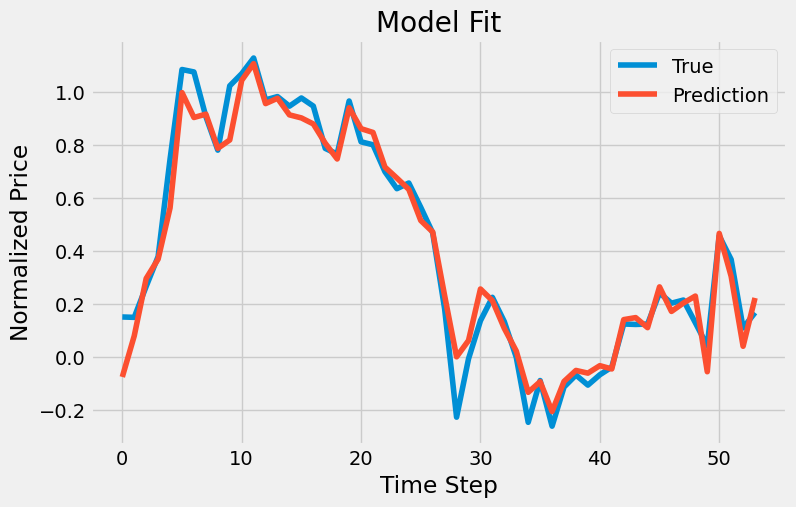

In [24]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

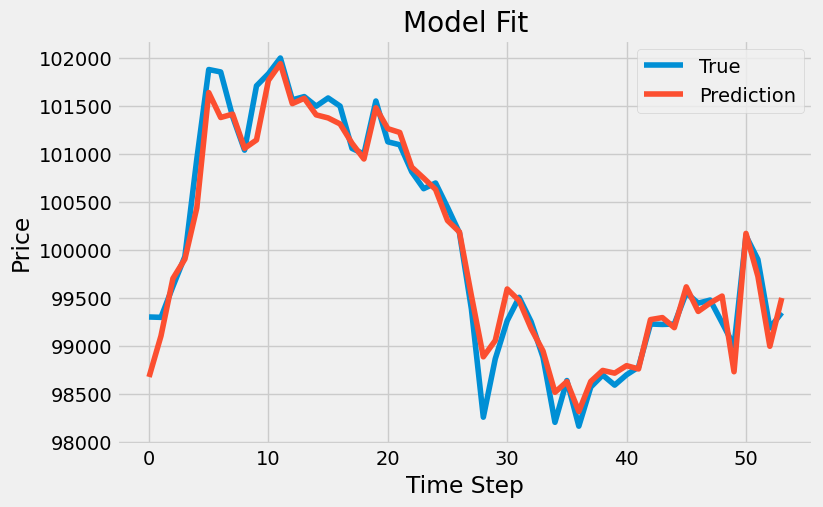

In [25]:
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(y_test_reshaped)
y_pred_inverse = scaler.inverse_transform(y_pred_reshaped)

y_test_inverse = y_test_inverse.flatten()
y_pred_inverse = y_pred_inverse.flatten()

plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(y_test_inverse, label='True')
plt.plot(y_pred_inverse, label='Prediction')
plt.legend()
plt.show()

In [26]:
testScore = np.sqrt(mean_squared_error(y_test_reshaped, y_pred_reshaped))
print('Test Score: %.2f RMSE' % testScore)

Test Score: 0.08 RMSE


In [27]:
from sklearn.metrics import r2_score

In [28]:
print('RSquared :','{:.2%}'.format(r2_score(y_test,y_pred)))

RSquared : 96.63%


In [29]:
model.save("Bitcoin_model.h5")

## Second Model

In [30]:
from sklearn.svm import SVR

In [31]:
trainX = df.iloc[:149,:4]
trainY = df.iloc[:149,-1]

testX = df.iloc[150:199,:4]
testY = df.iloc[150:199,-1]

In [32]:
svr_linear = SVR(kernel='linear',C=1e3, gamma=0.1)
svr_linear.fit(trainX,trainY)

SVR(C=1000.0, gamma=0.1, kernel='linear')

In [33]:
predY = svr_linear.predict(testX) 
print(predY)

[ 1.04244007  0.86480486  0.94733924  0.76190258  0.84275667  1.08612247
  1.08341922  0.96736805  1.01261315  0.9454824   0.91685762  0.88712028
  0.8488707   0.78951347  0.95837169  0.88815478  0.8685787   0.75464112
  0.7087322   0.65635408  0.55220862  0.4866022   0.24137677 -0.05371964
  0.07404672  0.25014024  0.22480657  0.11082459  0.00142321 -0.16618962
 -0.12542715 -0.26256731 -0.09380733 -0.07450119 -0.10589912 -0.03323934
 -0.02571256  0.16361782  0.14733595  0.08954229  0.24967551  0.16071437
  0.21320208  0.22202253 -0.04242709  0.45209292  0.33354284 -0.02379143
  0.18678421]


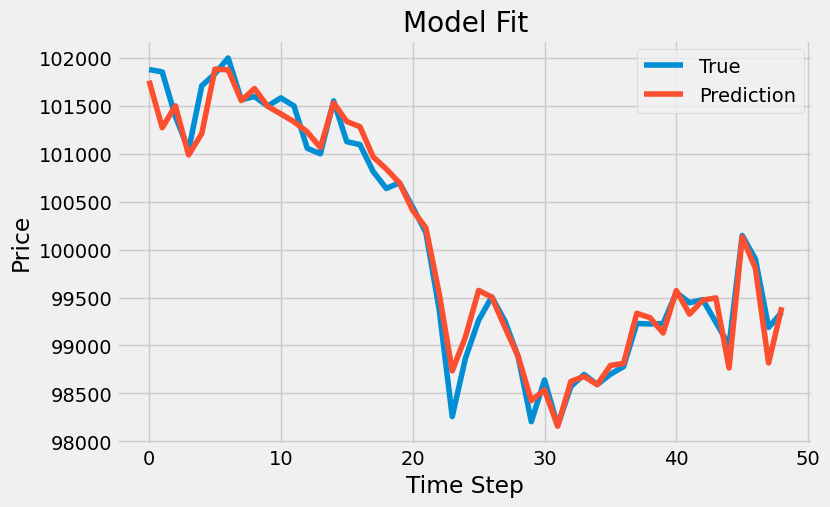

In [34]:
testY_array = np.array(testY).reshape(-1, 1)
predY_array = np.array(predY).reshape(-1, 1)

testY_inverse = scaler.inverse_transform(testY_array)
predY_inverse = scaler.inverse_transform(predY_array)

testY_inverse = testY_inverse.flatten()
predY_inverse = predY_inverse.flatten()

plt.figure(figsize=[8, 5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(testY_inverse, label='True')
plt.plot(predY_inverse, label='Prediction')
plt.legend()
plt.show()

In [35]:
testY_array = np.array(testY).reshape(-1, 1)
predY_array = np.array(predY).reshape(-1, 1)

testY_inverse = scaler.inverse_transform(testY_array)
predY_inverse = scaler.inverse_transform(predY_array)

testScore = np.sqrt(mean_squared_error(testY_inverse, predY_inverse))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 184.11 RMSE


In [36]:
print('RSquared :','{:.2%}'.format(r2_score(testY,predY)))

RSquared : 97.65%


## Hyperparameter tuning


In [37]:
param_grid = {"C": [1e-2,1e-1,1e0, 1e1, 1e2, 1e3, 1e4],
              "gamma": np.logspace(-2, 2, 50),
             'epsilon':[0.1,0.2,0.5,0.3]}

from sklearn.model_selection import RandomizedSearchCV

In [38]:
svm_model = SVR(kernel='linear')

In [39]:
grid_search = RandomizedSearchCV(svm_model,param_grid,scoring='r2',n_jobs=-1)

grid_search.fit(trainX,trainY)

print(grid_search.best_estimator_)

SVR(gamma=0.0212095088792019, kernel='linear')


In [40]:
svm_model = SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma=0.517947467923121,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svm_model.fit(trainX,trainY)

pred = svm_model.predict(testX)

In [41]:
testY_array = np.array(testY).reshape(-1, 1)
pred_array = np.array(pred).reshape(-1, 1)

testY_inverse = scaler.inverse_transform(testY_array)
pred_inverse = scaler.inverse_transform(pred_array)

testY_inverse_flat = testY_inverse.flatten()
pred_inverse_flat = pred_inverse.flatten()

testScore = np.sqrt(mean_squared_error(testY_inverse_flat, pred_inverse_flat))
print('Test Score: %.2f RMSE' % (testScore))



Test Score: 336.83 RMSE


In [42]:
print('RSquared :','{:.2%}'.format(r2_score(testY,pred)))

RSquared : 92.15%


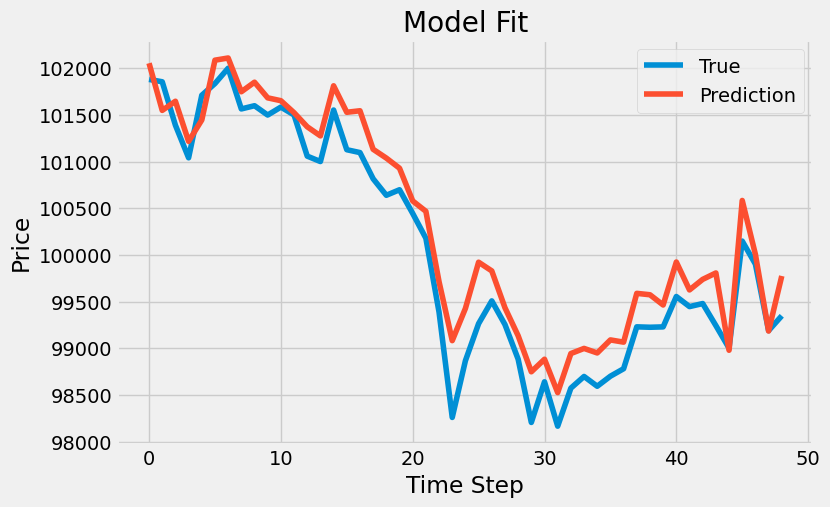

In [43]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY.values.reshape(-1, 1)), label='True')
plt.plot(scaler.inverse_transform(pred.reshape(-1, 1)), label='Prediction')
plt.legend()

## Ridge Regression

In [44]:
from sklearn.linear_model import RidgeCV

In [45]:
ridge = RidgeCV()

In [46]:
ridge.fit(trainX,trainY)

Rpred = ridge.predict(testX)

In [47]:
testY_array = np.array(testY).reshape(-1, 1)
Rpred_array = np.array(Rpred).reshape(-1, 1)

testY_inverse = scaler.inverse_transform(testY_array)
Rpred_inverse = scaler.inverse_transform(Rpred_array)

testY_inverse_flat = testY_inverse.flatten()
Rpred_inverse_flat = Rpred_inverse.flatten()

testScore = np.sqrt(mean_squared_error(testY_inverse_flat, Rpred_inverse_flat))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 181.01 RMSE


In [48]:
print('RSquared :','{:.2%}'.format(r2_score(testY,Rpred)))

RSquared : 97.73%


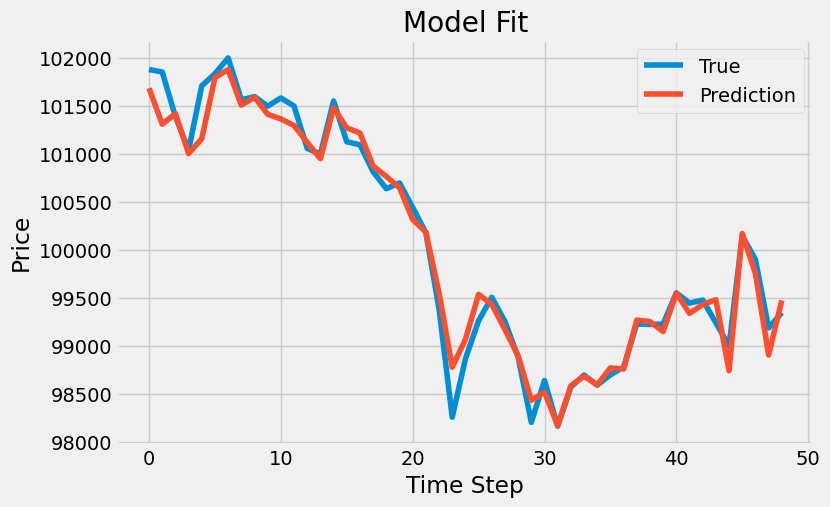

In [49]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(testY.values.reshape(-1, 1)), label='True')
plt.plot(scaler.inverse_transform(Rpred.reshape(-1, 1)), label='Prediction')
plt.legend()

## Hyperparameter Tuning

In [50]:
normal_price = np.array([float(candles[i][4]) for i in range(1000)])

In [51]:
data = pd.DataFrame(normal_price.reshape(200,5),columns=['First','Second','Third','Fourth','Target'])

In [52]:
data.head()

,First,Second,Third,Fourth,Target
0,102367.64,102352.40,102458.41,102465.96,102479.47
1,102455.49,102549.39,102549.01,102551.56,102491.72
2,102500.00,102451.08,102478.28,102429.60,102388.00
3,102339.99,102354.90,102346.81,102324.71,102294.07
4,102280.48,102389.76,102402.91,102447.88,102476.44


In [53]:
data.tail()

,First,Second,Third,Fourth,Target
195,99154.41,99239.99,100049.93,100291.38,100147.60
196,99880.56,100019.48,99984.72,99711.99,99900.74
197,99207.32,98688.71,98934.49,98994.14,99188.07
198,99248.65,99043.00,99604.46,99561.03,99347.19
199,99284.01,99225.01,99861.99,99618.87,99532.60


In [54]:
x_train_r = df.iloc[:149,:4]
y_train_r = df.iloc[:149,-1]

x_test_r = df.iloc[150:199,:4]
y_test_r = df.iloc[150:199,-1]

In [55]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(x_train_r, y_train_r)

/home/rambor/anaconda3/envs/trading_bot/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                              
Generation 1 - Current best internal CV score: -0.00896650355167595
                                                                              
Generation 2 - Current best internal CV score: -0.00896650355167595
                                                                              
Generation 3 - Current best internal CV score: -0.00878664585254002
                                                                              
Generation 4 - Current best internal CV score: -0.008705386747288662
                                                                              
Generation 5 - Current best internal CV score: -0.008705386747288662
                                                                              
Best pipeline: LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=1e-05)


TPOTRegressor(generations=5, population_size=50, verbosity=2)

In [56]:
tpred = tpot.predict(x_test_r)

In [57]:
testScore = np.sqrt(mean_squared_error(y_test_r,tpred))
print('Test Score: %.2f RMSE' % (testScore))

print('RSquared :','{:.2%}'.format(r2_score(y_test_r,tpred)))

Test Score: 0.07 RMSE
RSquared : 97.35%


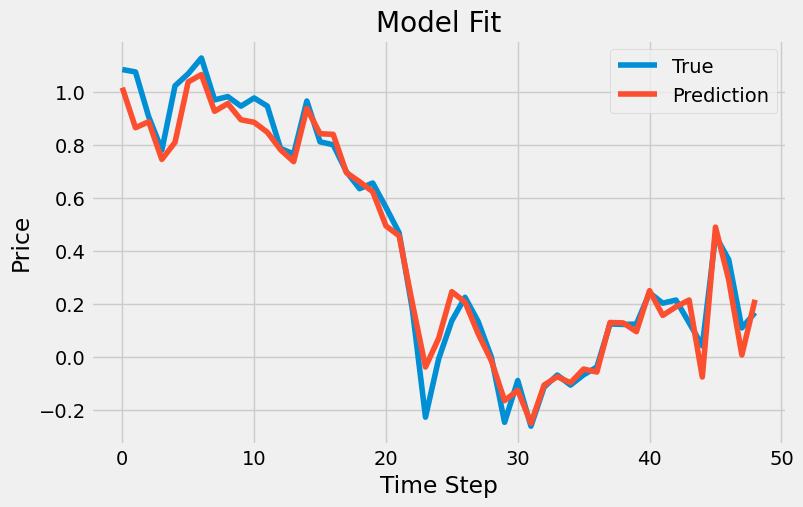

In [59]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(np.array(y_test_r).reshape(49,), label='True')
plt.plot(tpred, label='Prediction')
plt.legend()

## Trading bot

In [60]:
check = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_5MINUTE, limit=1000)

check[499]

[1738536000000,
 '96766.65000000',
 '97160.00000000',
 '96150.00000000',
 '97160.00000000',
 '631.08029000',
 1738536299999,
 '60899906.01172380',
 82214,
 '237.68775000',
 '22939037.52669100',
 '0']

In [61]:
index = [996, 997, 998, 999]

candles = np.array([float(check[i][4]) for i in index]).reshape(-1, 1)

candles_scaled = scaler.transform(candles)

model_feed = candles_scaled.reshape(1, 4, 1)

prediction_scaled = model.predict(model_feed)

prediction = scaler.inverse_transform(prediction_scaled.reshape(-1, 1))

predicted_price = prediction[0, 0]
print(predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
99753.32


In [62]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from binance.client import Client
import os
from dotenv import load_dotenv
import time  
import tensorflow as tf

tf.keras.utils.disable_interactive_logging()

load_dotenv()

api_key = os.getenv("API_KEY")
api_secret = os.getenv("API_SECRET")

client = Client(api_key, api_secret)

symbol = 'BTCUSDT'
quantity = '0.0001' 
position = None 
index = [996, 997, 998, 999]

trades_df = pd.DataFrame(columns=['buy_price', 'buy_time', 'sell_price', 'sell_time', 'profit', 'profit_before_fees', 'direction', 'sell_reason'])

start_time = datetime.now()

total_profit = 0
total_profit_before_fees = 0
successful_trades = 0
failed_trades = 0

fee_rate = 0.00075  
profit_threshold = 150  
stop_loss_threshold = 150 

time_limit = timedelta(hours=1)

while datetime.now() < start_time + time_limit or position:
    try:
        price = client.get_recent_trades(symbol=symbol)
        candle = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_5MINUTE, limit=1000)
        
        candles = np.array([float(candle[i][4]) for i in index]).reshape(-1, 1)
        candles_scaled = scaler.transform(candles)
        model_feed = candles_scaled.reshape(1, 4, 1)

        predicted_price = float(scaler.inverse_transform(model.predict(model_feed))[0][0])
        current_price = float(price[-1]['price'])

        if not position and datetime.now() < start_time + time_limit:
            if predicted_price >= current_price + profit_threshold:  
                print(f"Predicted price: {predicted_price}, Current price: {current_price}")
                position = 'long'
                buy_price = float(client.get_order_book(symbol=symbol)['asks'][0][0])
                buy_time = datetime.now()
                stop_loss_price = buy_price - stop_loss_threshold
                # client.order_limit_buy(symbol=symbol, quantity=quantity, price=buy_price)
                print('Long position taken @', buy_price, 'USDT, Stop-Loss:', stop_loss_price)

            elif predicted_price <= current_price - profit_threshold:  
                print(f"Predicted price: {predicted_price}, Current price: {current_price}")
                position = 'short'
                sell_price = float(client.get_order_book(symbol=symbol)['bids'][0][0])
                sell_time = datetime.now()
                stop_loss_price = sell_price + stop_loss_threshold
                # client.order_limit_sell(symbol=symbol, quantity=quantity, price=sell_price)
                print('Short position taken @', sell_price, 'USDT, Stop-Loss:', stop_loss_price)

        if position:
            current_time = datetime.now()
            current_price = float(price[-1]['price'])
            sell_reason = ""  

            if position == 'long':
                if current_price < stop_loss_price:
                    sell_reason = "Long position stop-loss triggered"
                    position = None
                elif (current_price - buy_price) >= profit_threshold:
                    sell_reason = "Long position profit target reached"
                    position = None
                elif (current_time - buy_time) >= timedelta(minutes=5):
                    sell_reason = "Long position time limit reached"
                    position = None
                
                if position is None:  
                    sell_price = float(client.get_order_book(symbol=symbol)['bids'][0][0])
                    sell_time = current_time
                    #client.order_limit_sell(symbol=symbol, quantity=quantity, price=sell_price)

            elif position == 'short':
                if current_price > stop_loss_price:
                    sell_reason = "Short position stop-loss triggered"
                    position = None
                elif (sell_price - current_price) >= profit_threshold:
                    sell_reason = "Short position profit target reached"
                    position = None
                elif (current_time - sell_time) >= timedelta(minutes=5):
                    sell_reason = "Short position time limit reached"
                    position = None

                if position is None:  
                    buy_price = float(client.get_order_book(symbol=symbol)['asks'][0][0])
                    buy_time = current_time
                    #client.order_limit_buy(symbol=symbol, quantity=quantity, price=buy_price)

            if position is None:  
                profit_before_fees = (sell_price - buy_price) * float(quantity) if sell_reason.startswith("Long") else (buy_price - sell_price) * float(quantity)
                buy_cost = buy_price * float(quantity) * (1 + fee_rate)
                sell_revenue = sell_price * float(quantity) * (1 - fee_rate)
                profit = sell_revenue - buy_cost

                total_profit += profit
                total_profit_before_fees += profit_before_fees

                if profit > 0:
                    successful_trades += 1
                else:
                    failed_trades += 1

                new_trade = pd.DataFrame({
                    'buy_price': [buy_price],
                    'buy_time': [buy_time],
                    'sell_price': [sell_price],
                    'sell_time': [sell_time],
                    'profit': [profit],
                    'profit_before_fees': [profit_before_fees],
                    'sell_reason': [sell_reason],
                    'direction': ['long' if sell_reason.startswith("Long") else 'short']
                })
                trades_df = pd.concat([trades_df, new_trade], ignore_index=True)
                
                print(f'Sell @Limit Price: {sell_price} USDT, Timestamp: {str(sell_time)}, Reason: {sell_reason}, Profit: {profit} USDT')

    except Exception as e:
        print("An error occurred:", e)
        time.sleep(5) 

print("Total profit after fees:", total_profit, "USDT")
print(trades_df)


KeyboardInterrupt: 